In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

C:\Users\mindr\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [2]:
df=pd.read_csv('wine_low.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,output
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [3]:
columns=df.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'output'],
      dtype='object')

## Defining Train and Test Data

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       154
           1       0.86      0.79      0.82        75

    accuracy                           0.89       229
   macro avg       0.88      0.86      0.87       229
weighted avg       0.89      0.89      0.89       229



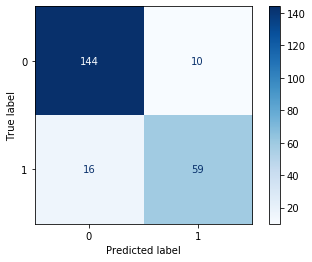

In [6]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [7]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.8864628820960698
[0.85869565 0.89130435 0.82608696 0.82608696 0.83695652 0.92307692
 0.9010989  0.82417582 0.91208791 0.85714286]
Accuracy (after cross-validation): 0.8656712852365027 (+/- 0.03628184532360681)
[0.69889225 0.76054138 0.61686622 0.6116095  0.64322647 0.83008802
 0.77834912 0.62512873 0.80440623 0.67508926]
Cohen Kappa Score (after cross-validation): 0.7044197189809338 (+/- 0.07849004963162173)


## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [9]:
#Original Imbalance

target_count=df.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

0    744
1    400
Name: output, dtype: int64
34.96503496503497


In [13]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [14]:
bins= create_bins(df,10, imbalance_target)

Original Imbalance in the dataset: 34.96503496503497 %
Class imbalance ratio in bin 0 : 35.08771929824561 %
Class imbalance ratio in bin 1 : 35.08771929824561 %
Class imbalance ratio in bin 2 : 35.08771929824561 %
Class imbalance ratio in bin 3 : 35.08771929824561 %
Class imbalance ratio in bin 4 : 35.08771929824561 %
Class imbalance ratio in bin 5 : 35.08771929824561 %
Class imbalance ratio in bin 6 : 35.08771929824561 %
Class imbalance ratio in bin 7 : 35.08771929824561 %
Class imbalance ratio in bin 8 : 35.08771929824561 %
Class imbalance ratio in bin 9 : 35.08771929824561 %


## Analyzing the number of clusters using Elbow method and Silhouette method

In [15]:
model_accuracies={} 
model_kappa_scores={} 

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


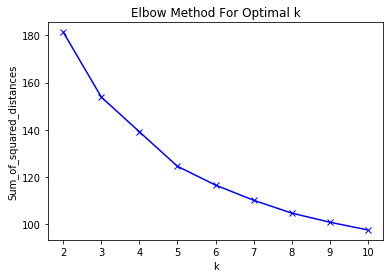

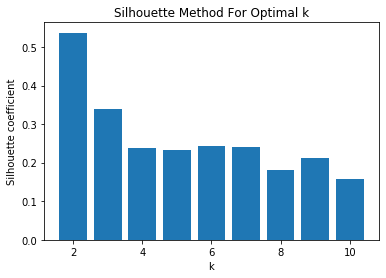

In [16]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=9 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [19]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=3 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class
  


test_cluster =pd.DataFrame(test_data)
test_cluster.columns=df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
    g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
    if(len(g['test_{}'.format(i)])!=0):
        if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
            g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
            g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
            g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
        else:
            g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

Accuracy : 0.6491228070175439


In [20]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
acc_values

array([0.64912281])

In [21]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
kappa_values

array([0.73685141])

In [30]:
from sklearn.metrics import make_scorer

print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Random Forest model:
Accuracy (after cross-validation): 0.8656712852365027 (+/- 0.03628184532360681)
New model:
Accuracy : 0.6491228070175439 (+/- 0.0)


In [31]:
print("Kappa Scores:")
print("Random Forest: : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))
print("New Model: : {} (+/- {})".format(kappa_values.mean(),kappa_values.std()))

Kappa Scores:
Random Forest: : 0.7044197189809338 (+/- 0.07849004963162173)
New Model: : 0.7368514098824361 (+/- 0.0)


## Permutation Tests

In [32]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
    concat = np.concatenate((data_1,data_2))
    cnt=0
    for i in range(0,iterations):
        perm = np.random.permutation(concat)
        pcurrent = perm[:len(data_1)]
        pnew = perm[len(data_1):]
        mean_perm_current=pcurrent.mean()
        mean_perm_new=pnew.mean()
        t_perm=mean_perm_new-mean_perm_current
        if(t_perm>t_obs):
            cnt+=1
            p_value=cnt/iterations
    return p_value